![banner](../banner.jpg)

***[Workshop 1](about) - Training course in data analysis for genomic surveillance of African malaria vectors***

---

# Module 2 - Accessing and exploring *Anopheles* genomic data

**Theme: Data**

This module provides an introduction to accessing and exploring data about *Anopheles* mosquito specimens collected in the field and submitted for whole-genome sequencing by MalariaGEN.

## Learning objectives

After completing this module, you will be able to:

* Explain how *Anopheles* genomic data are generated.
* Explain what types of data are available from MalariaGEN.
* Explain where data from MalariaGEN are stored.
* Use the `malariagen_data` Python package to access `Ag3.0` data in Google Cloud.
* Explore the `Ag3.0` data release and summarise the mosquito samples for which genomic data are available using pivot tables and maps.

## Lecture

### English

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/c4vEBhZm3QI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Français

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/TocNfwILAr8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Where do the data come from?

* The data we'll be analysing in this training course where generated by multiple research groups collaborating as part of the Malaria Genomic Epidemiology Network ([MalariaGEN](https://www.malariagen.net)).

* MalariaGEN is a collaborative programme providing access to genome sequencing and data processing services to support surveillance of malaria parasites and vectors. 

* Through this programme, members of research groups and disease control programmes in malaria-endemic countries work in partnership with the Wellcome Sanger Institute.

* The basic workflow involves collecting mosquitoes, shipping them to sequencing facilities, preparing DNA samples and performing Illumina whole-genome sequencing, then processing the resulting data so they are ready for analysis, as shown below. 

In [ ]:
%%html
<iframe frameborder="0" style="width:100%;height:700px;" src="https://viewer.diagrams.net/?tags=%7B%7D&highlight=0000ff&edit=_blank&layers=1&nav=1&title=vobs-process-high-level#Uhttps%3A%2F%2Fdrive.google.com%2Fuc%3Fid%3D1Bb3_JjzPi_ZFeTTFYB4dwPRNgi0g7xAJ%26export%3Ddownload"></iframe>

* Note that raw genome sequence data is not particularly useful by itself, and so the sequence reads are processed through **variant-calling pipelines** which identify different types of genetic variation between individual mosquitoes.

* The results of variant-calling pipelines are then passed through a number of quality control, filtering and annotation steps to ensure data quality. We call this process **data curation**.

* The **analysis-ready genome variation data** is then made available to all partners in the collaboration. This data can then be analysed to answer questions about the surveillance of mosquito populations, such as whether new forms of insecticide resistance are emerging and spreading.


## What types of analysis-ready genomic data are available?

* When DNA is passed from one generation of mosquitoes to the next, it undergoes **mutations**, which are errors in the DNA copying process. There are different types of mutations that can occur. These include:

  * **Single Nucleotide Polymorphisms (SNPs)** - substitutions of a single letter in the DNA sequence

  * **Copy Number Variants (CNVs)** - duplications or deletions of sections of a DNA sequence

* Different variant calling pipelines are used to identify these different types of mutations.

* It is also very useful to know whether combinations of mutations occur together in the same DNA sequence. In order to reconstruct this information, another pipeline is used to produce **phased haplotypes**.

* To help make sense of the genomic data, we also need some data about the mosquitoes which were sequenced, such as the time and place of collection. This data is known as **sample metadata**.

We will revisit CNVs and haplotypes in future workshops. For this workshop, we are only interested in SNPs and sample metadata.



In [ ]:
%%html
<iframe frameborder="0" style="width:100%;height:350px;" src="https://viewer.diagrams.net/?tags=%7B%7D&target=blank&highlight=0000ff&edit=_blank&layers=1&nav=1&title=vobs-data-breakdown#Uhttps%3A%2F%2Fdrive.google.com%2Fuc%3Fid%3D13q2N2RETSCS07sH9qQgTmaWR5JvFSZcZ%26export%3Ddownload"></iframe>

## Where are the data stored?

* To make accessing these data as simple as possible, the resulting data are stored in Google Cloud using a service called Google Cloud Storage (GCS). These data can then be downloaded to any computer, or can be analysed within the cloud using cloud computing services like colab.

* If you are using colab to access and analyses these data, then you don't need to download any data to your own computer or install any special software. You access colab through a web browser, and the code you run is executed on a different computer (a "virtual machine") which sits alongside the data in Google Cloud. 
 

In [ ]:
%%html
<iframe frameborder="0" style="width:100%;height:700px;" src="https://viewer.diagrams.net/?highlight=0000ff&edit=_blank&nav=1&title=vobs-cloud-store.drawio#Uhttps%3A%2F%2Fdrive.google.com%2Fuc%3Fid%3D1W5SVx6w6FhnxwPHRtEuuG8JV8es12NU-%26export%3Ddownload"></iframe>

## Accessing the `Ag3.0` data resource

In this workshop we'll be accessing and analysing data from the [*Anopheles gambiae* 1000 Genomes Project phase 3 data resource](https://malariagen.github.io/vector-data/ag3/intro.html), also known as "Ag3.0" for short. This includes data from whole-genome sequencing of 3,081 mosquitoes from 19 African countries.

To set up your notebook to access these data, first install the [malariagen_data](https://github.com/malariagen/malariagen-data-python) package.

In [1]:
!pip install -q malariagen_data

     |████████████████████████████████| 100 kB 4.4 MB/s 
     |████████████████████████████████| 5.7 MB 17.8 MB/s 
     |████████████████████████████████| 301 kB 38.8 MB/s 
     |████████████████████████████████| 3.7 MB 36.5 MB/s 
     |████████████████████████████████| 3.6 MB 44.2 MB/s 
     |████████████████████████████████| 9.9 MB 44.1 MB/s 
     |████████████████████████████████| 185 kB 41.8 MB/s 
     |████████████████████████████████| 3.0 MB 52.7 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 1.6 MB 51.0 MB/s 
     |████████████████████████████████| 6.6 MB 30.8 MB/s 


Then import packages and set up access to *Anopheles gambiae* genomic data.

In [3]:
import plotly.express as px
import malariagen_data

In [4]:
# ag3 = malariagen_data.Ag3(pre = True)
ag3 = malariagen_data.Ag3()
ag3

ValueError: ignored

In [ ]:
ag3?

In [ ]:
dir(malariagen_data)

['Af1',
 'Ag3',
 'Amin1',
 'AnophelesDataResource',
 'Pf7',
 'Pv4',
 'Region',
 'SiteClass',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'af1',
 'ag3',
 'amin1',
 'anopheles',
 'importlib_metadata',
 'mjn',
 'pf7',
 'plasmodium',
 'pv4',
 'util',
 'veff']

In [ ]:
dir(malariagen_data.ag3)

['AA_CHANGE_QUERY',
 'Ag3',
 'AnophelesDataResource',
 'CONTIGS',
 'CacheMiss',
 'Counter',
 'DEFAULT_GENES_TRACK_HEIGHT',
 'DEFAULT_GENOME_PLOT_WIDTH',
 'DEFAULT_MAX_COVERAGE_VARIANCE',
 'DEFAULT_SITE_MASK',
 'DIM_ALLELE',
 'DIM_PLOIDY',
 'DIM_SAMPLE',
 'DIM_VARIANT',
 'GCS_URL',
 'GENOME_FAI_PATH',
 'GENOME_FASTA_PATH',
 'GENOME_REF_ID',
 'GENOME_REF_NAME',
 'GENOME_ZARR_PATH',
 'MAJOR_VERSION_GCS_STR',
 'MAJOR_VERSION_INT',
 'PCA_RESULTS_CACHE_NAME',
 'Region',
 'SITE_ANNOTATIONS_ZARR_PATH',
 'SNP_ALLELE_COUNTS_CACHE_NAME',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_cn_mode',
 '_cn_mode_1d',
 '_get_max_hamming_distance',
 '_h1x',
 '_hamming_to_snps',
 '_haplotype_frequencies',
 '_haplotype_joint_frequencies',
 '_moving_h1x',
 'allel',
 'bisect_left',
 'bisect_right',
 'colab',
 'da',
 'da_from_zarr',
 'dask',
 'dedent',
 'hash_params',
 'init_zarr_store',
 'jackknife_ci',
 'jitter',
 'json',
 'locate_region',


In [ ]:
?malariagen_data.Ag3
dir(ag3)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_frequency_ci',
 '_aim_calls_dataset',
 '_annotator',
 '_base_path',
 '_block_jackknife_cohort_diversity_stats',
 '_bokeh_style_genome_xaxis',
 '_build_cohorts_from_sample_grouping',
 '_cache_aim_variants',
 '_cache_annotator',
 '_cache_cnv_coverage_calls',
 '_cache_cnv_discordant_read_calls',
 '_cache_cnv_hmm',
 '_cache_cohort_metadata',
 '_cache_cross_metadata',
 '_cache_general_metadata',
 '_cache_geneset',
 '_cache_genome',
 '_cache_genome_features',
 '_cache_haplotype_sites',
 '_cache_haplotypes',
 '_cache_locate_site_class',
 '_cache_releases',
 '_cache_sample

You can now access a number of different types of data through the `ag3` object. The full list of functions is available from the [Ag3 API docs](https://malariagen.github.io/vector-data/ag3/api.html). For the rest of this module, we are just going to look at sample metadata.

## Loading sample metadata

We can use the [`sample_metadata()`](https://malariagen.github.io/vector-data/ag3/api.html#sample-metadata) function to retrieve a pandas DataFrame containing metadata about all 3,081 samples in the Ag3.0 resource. In this DataFrame, each row represents one mosquito sample, and the columns such as `country` and `year` provide information about where the mosquito was originally collected.

In [ ]:
df_samples = ag3.sample_metadata(sample_sets="3.0")
df_samples

Load sample metadata:   0%|          | 0/28 [00:00<?, ?it/s]

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,aim_species,country_iso,admin1_name,admin1_iso,admin2_name,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin2_year,cohort_admin2_month
0,AR0047-C,LUA047,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,coluzzii,AGO,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04
1,AR0049-C,LUA049,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,coluzzii,AGO,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04
2,AR0051-C,LUA051,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,coluzzii,AGO,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04
3,AR0061-C,LUA061,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,coluzzii,AGO,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04
4,AR0078-C,LUA078,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,...,coluzzii,AGO,Luanda,AO-LUA,Luanda,coluzzii,AO-LUA_colu_2009,AO-LUA_colu_2009_04,AO-LUA_Luanda_colu_2009,AO-LUA_Luanda_colu_2009_04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,AD0494-C,80-2-o-16,Martin Donnelly,Lab Cross,LSTM,-1,-1,53.409,-2.969,F,...,intermediate_gambiae_coluzzii,NaN,NaN,NaN,NaN,intermediate_gambiae_coluzzii,NaN,NaN,NaN,NaN
3077,AD0495-C,80-2-o-17,Martin Donnelly,Lab Cross,LSTM,-1,-1,53.409,-2.969,M,...,intermediate_gambiae_coluzzii,NaN,NaN,NaN,NaN,intermediate_gambiae_coluzzii,NaN,NaN,NaN,NaN
3078,AD0496-C,80-2-o-18,Martin Donnelly,Lab Cross,LSTM,-1,-1,53.409,-2.969,M,...,intermediate_gambiae_coluzzii,NaN,NaN,NaN,NaN,intermediate_gambiae_coluzzii,NaN,NaN,NaN,NaN
3079,AD0497-C,80-2-o-19,Martin Donnelly,Lab Cross,LSTM,-1,-1,53.409,-2.969,F,...,intermediate_gambiae_coluzzii,NaN,NaN,NaN,NaN,intermediate_gambiae_coluzzii,NaN,NaN,NaN,NaN


In [ ]:
df_samples.columns.to_list()

['sample_id',
 'partner_sample_id',
 'contributor',
 'country',
 'location',
 'year',
 'month',
 'latitude',
 'longitude',
 'sex_call',
 'sample_set',
 'release',
 'aim_species_fraction_arab',
 'aim_species_fraction_colu',
 'aim_species_fraction_colu_no2l',
 'aim_species_gambcolu_arabiensis',
 'aim_species_gambiae_coluzzii',
 'aim_species',
 'country_iso',
 'admin1_name',
 'admin1_iso',
 'admin2_name',
 'taxon',
 'cohort_admin1_year',
 'cohort_admin1_month',
 'cohort_admin2_year',
 'cohort_admin2_month']

## Exploring sample metadata

Let's use some pandas features such as [`groupby()`](https://pandas.pydata.org/docs/user_guide/groupby.html) and [`query()`](https://pandas.pydata.org/docs/user_guide/indexing.html#the-query-method) to explore the sample metadata. 

For example, let's first find out a bit more information about the different countries represented.

In [ ]:
df_samples.groupby("country").size()

country
Angola                               81
Burkina Faso                        296
Cameroon                            444
Central African Republic             73
Cote d'Ivoire                        80
Democratic Republic of the Congo     76
Equatorial Guinea                    10
Gabon                                69
Gambia, The                         279
Ghana                               100
Guinea                              136
Guinea-Bissau                       101
Kenya                                86
Lab Cross                           297
Malawi                               41
Mali                                225
Mayotte                              23
Mozambique                           74
Tanzania                            300
Uganda                              290
dtype: int64

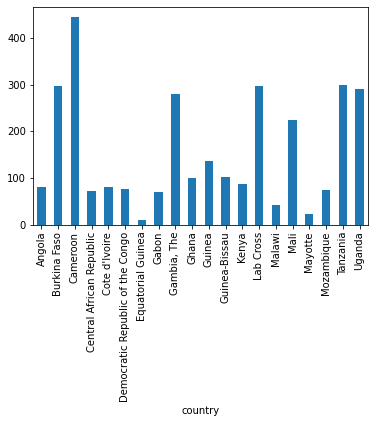

In [ ]:
df_samples.groupby("country").size().plot(kind = "bar")

We can then use the pandas query() function to select all samples from a given country. E.g., find all samples from Burkina Faso.

In [ ]:
df_samples.query("country == 'Burkina Faso'")

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,aim_species,country_iso,admin1_name,admin1_iso,admin2_name,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin2_year,cohort_admin2_month
81,AB0085-Cx,BF2-4,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,gambiae,BFA,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07
82,AB0086-Cx,BF2-6,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,gambiae,BFA,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07
83,AB0087-C,BF3-3,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,coluzzii,BFA,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07
84,AB0088-C,BF3-5,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,coluzzii,BFA,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07
85,AB0089-Cx,BF3-8,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,coluzzii,BFA,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,AB0314-C,6775,Nora Besansky,Burkina Faso,Monomtenga,2004,8,12.060,-1.170,F,...,gambiae,BFA,Centre-Sud,BF-07,Bazega,gambiae,BF-07_gamb_2004,BF-07_gamb_2004_08,BF-07_Bazega_gamb_2004,BF-07_Bazega_gamb_2004_08
373,AB0315-C,6777,Nora Besansky,Burkina Faso,Monomtenga,2004,8,12.060,-1.170,F,...,gambiae,BFA,Centre-Sud,BF-07,Bazega,gambiae,BF-07_gamb_2004,BF-07_gamb_2004_08,BF-07_Bazega_gamb_2004,BF-07_Bazega_gamb_2004_08
374,AB0316-C,6779,Nora Besansky,Burkina Faso,Monomtenga,2004,8,12.060,-1.170,F,...,gambiae,BFA,Centre-Sud,BF-07,Bazega,gambiae,BF-07_gamb_2004,BF-07_gamb_2004_08,BF-07_Bazega_gamb_2004,BF-07_Bazega_gamb_2004_08
375,AB0318-C,5072,Nora Besansky,Burkina Faso,Monomtenga,2004,7,12.060,-1.170,F,...,gambiae,BFA,Centre-Sud,BF-07,Bazega,gambiae,BF-07_gamb_2004,BF-07_gamb_2004_07,BF-07_Bazega_gamb_2004,BF-07_Bazega_gamb_2004_07


From a quick glance at the preview above, we can see there are samples collected in different years. Let's summarise that.

In [ ]:
df_samples.query("country == 'Burkina Faso'").groupby("year").size()

year
2004     13
2012    181
2014    102
dtype: int64

If we wanted to now inspect the samples collected from Burkina Faso in 2014, we could combine these conditions in a query.

In [ ]:
df_samples.query("country == 'Burkina Faso' and year == 2014")

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,aim_species,country_iso,admin1_name,admin1_iso,admin2_name,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin2_year,cohort_admin2_month
262,AB0326-C,BF18-1,Austin Burt,Burkina Faso,Bana Village,2014,7,11.233,-4.472,F,...,coluzzii,BFA,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2014,BF-09_colu_2014_07,BF-09_Houet_colu_2014,BF-09_Houet_colu_2014_07
263,AB0327-C,BF18-3,Austin Burt,Burkina Faso,Bana Village,2014,7,11.233,-4.472,F,...,coluzzii,BFA,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2014,BF-09_colu_2014_07,BF-09_Houet_colu_2014,BF-09_Houet_colu_2014_07
264,AB0328-C,BF18-4,Austin Burt,Burkina Faso,Bana Village,2014,7,11.233,-4.472,F,...,coluzzii,BFA,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2014,BF-09_colu_2014_07,BF-09_Houet_colu_2014,BF-09_Houet_colu_2014_07
265,AB0329-C,BF18-5,Austin Burt,Burkina Faso,Bana Village,2014,7,11.233,-4.472,F,...,coluzzii,BFA,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2014,BF-09_colu_2014_07,BF-09_Houet_colu_2014,BF-09_Houet_colu_2014_07
266,AB0330-C,BF18-6,Austin Burt,Burkina Faso,Bana Village,2014,7,11.233,-4.472,F,...,coluzzii,BFA,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2014,BF-09_colu_2014_07,BF-09_Houet_colu_2014,BF-09_Houet_colu_2014_07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,AB0533-C,BF13-18,Austin Burt,Burkina Faso,Souroukoudinga,2014,7,11.238,-4.235,F,...,gambiae,BFA,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2014,BF-09_gamb_2014_07,BF-09_Houet_gamb_2014,BF-09_Houet_gamb_2014_07
360,AB0536-C,BF13-31,Austin Burt,Burkina Faso,Souroukoudinga,2014,7,11.238,-4.235,F,...,gambiae,BFA,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2014,BF-09_gamb_2014_07,BF-09_Houet_gamb_2014,BF-09_Houet_gamb_2014_07
361,AB0537-C,BF13-32,Austin Burt,Burkina Faso,Souroukoudinga,2014,7,11.238,-4.235,F,...,gambiae,BFA,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2014,BF-09_gamb_2014_07,BF-09_Houet_gamb_2014,BF-09_Houet_gamb_2014_07
362,AB0538-C,BF13-33,Austin Burt,Burkina Faso,Souroukoudinga,2014,7,11.238,-4.235,F,...,gambiae,BFA,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2014,BF-09_gamb_2014_07,BF-09_Houet_gamb_2014,BF-09_Houet_gamb_2014_07


Finally, let's break this down by mosquito species.

In [ ]:
df_samples.query("country == 'Burkina Faso' and year == 2014").groupby("taxon").size()

taxon
arabiensis     3
coluzzii      53
gambiae       46
dtype: int64

## Summarising sample metadata with pivot tables

In the examples above we explored a part of the sample metadata, but it can also be useful to get an overall summary of how many samples have been sequenced, broken down by time and place of collection and mosquito species. For that kind of summary the [`pivot_table()`](https://pandas.pydata.org/docs/user_guide/reshaping.html#pivot-tables) function is useful.

Let's start by summarising the number of mosquitoes by country and species (taxon).

In [ ]:
pivot_country_taxon = (
    df_samples
    .pivot_table(
        index="country", 
        columns="taxon", 
        values="sample_id",
        aggfunc="count",
        fill_value=0
    )
)
pivot_country_taxon

taxon,arabiensis,coluzzii,gambiae,gcx1,gcx2,gcx3,intermediate_gambcolu_arabiensis,intermediate_gambiae_coluzzii
country,,,,,,,,
Angola,0,81,0,0,0,0,0,0
Burkina Faso,3,135,157,0,0,0,0,1
Cameroon,2,26,416,0,0,0,0,0
Central African Republic,0,18,55,0,0,0,0,0
Cote d'Ivoire,0,80,0,0,0,0,0,0
Democratic Republic of the Congo,0,0,76,0,0,0,0,0
Equatorial Guinea,0,0,10,0,0,0,0,0
Gabon,0,0,69,0,0,0,0,0
"Gambia, The",0,14,2,77,185,0,0,1


We could also turn this into a bar chart.

In [ ]:
fig = px.bar(pivot_country_taxon, height=600, width=800)
fig.update_layout(
    title="Ag3.0 genomes sequenced",
    yaxis_title="no. genomes",
)
fig

Mosquitoes were also sampled in different years. Let's make a new pivot table, breaking down by country, year and taxon.

In [ ]:
pivot_country_year_taxon = (
    df_samples
    .pivot_table(
        index=["country", "year"], 
        columns=["taxon"], 
        values="sample_id",
        aggfunc="count",
        fill_value=0
    )
)
pivot_country_year_taxon

taxon                                   arabiensis  coluzzii  gambiae  gcx1  \
country                          year                                         
Angola                            2009           0        81        0     0   
Burkina Faso                      2004           0         0       13     0   
                                  2012           0        82       98     0   
                                  2014           3        53       46     0   
Cameroon                          2005           0         7       90     0   
                                  2009           0         0      303     0   
                                  2013           2        19       23     0   
Central African Republic          1993           0         5        2     0   
                                  1994           0        13       53     0   
Cote d'Ivoire                     2012           0        80        0     0   
Democratic Republic of the Congo  2015           0         0       76     0   
Equatorial Guinea                 2002           0         0       10     0   
Gabon                             2000           0         0       69     0   
Gambia, The                       2011           0         0        0    68   
                                  2012           0        14        2     9   
Ghana                             2012           0        64       36     0   
Guinea                            2012           0        11      123     0   
Guinea-Bissau                     2010           0         0        8    93   
Kenya                             2000           0         0       19     0   
                                  2007           3         0        0     0   
                                  2012          10         0        0     0   
Lab Cross                        -1              0        74       49     0   
Malawi                            2015          41         0        0     0   
Mali                              2004           2        36       33     0   
                                  2012           0        28       65     0   
                                  2014           0        27       33     0   
Mayotte                           2011           0         0       23     0   
Mozambique                        2003           0         0        3     0   
                                  2004           0         0       71     0   
Tanzania                          2012          87         0        0     0   
                                  2013           1         0       32     0   
                                  2015         137         0       32     0   
Uganda                            2012          82         0      207     0   

taxon                                   gcx2  gcx3  \
country                          year                
Angola                            2009     0     0   
Burkina Faso                      2004     0     0   
                                  2012     0     0   
                                  2014     0     0   
Cameroon                          2005     0     0   
                                  2009     0     0   
                                  2013     0     0   
Central African Republic          1993     0     0   
                                  1994     0     0   
Cote d'Ivoire                     2012     0     0   
Democratic Republic of the Congo  2015     0     0   
Equatorial Guinea                 2002     0     0   
Gabon                             2000     0     0   
Gambia, The                       2011     6     0   
                                  2012   179     0   
Ghana                             2012     0     0   
Guinea                            2012     0     0   
Guinea-Bissau                     2010     0     0   
Kenya                             2000     0     0   
                                  2007     0     0   
                                  2012     0  

For some countries there are data from multiple collection sites. Let's inspect that for Burkina Faso by applying a query then creating a pivot table.

In [ ]:
pivot_location_year_taxon_bf = (
    df_samples
    .query("country == 'Burkina Faso'")
    .pivot_table(
        index=["country", "admin1_name", "admin2_name", "location", "year"], 
        columns=["taxon"], 
        values="sample_id",
        aggfunc="count",
        fill_value=0
    )
)
pivot_location_year_taxon_bf

taxon                                                       arabiensis  \
country      admin1_name   admin2_name location       year               
Burkina Faso Centre-Sud    Bazega      Monomtenga     2004           0   
             Hauts-Bassins Houet       Bana Village   2012           0   
                                                      2014           1   
                                       Pala           2012           0   
                                                      2014           2   
                                       Souroukoudinga 2012           0   
                                                      2014           0   

taxon                                                       coluzzii  gambiae  \
country      admin1_name   admin2_name location       year                      
Burkina Faso Centre-Sud    Bazega      Monomtenga     2004         0       13   
             Hauts-Bassins Houet       Bana Village   2012        42       22   
                                                      2014        47       15   
                                       Pala           2012        11       48   
                                                      2014         0       16   
                                       Souroukoudinga 2012        29       28   
                                                      2014         6       15   

taxon                                                       intermediate_gambiae_coluzzii  
country      admin1_name   admin2_name location       year                                 
Burkina Faso Centre-Sud    Bazega      Monomtenga     2004                              0  
             Hauts-Bassins Houet       Bana Village   2012                              1  
                                                      2014                              0  
                                       Pala           2012                              0  
                                                      2014                              0  
                                       Souroukoudinga 2012                              0  
                                                      2014                              0

We can see there are four collection sites in Burkina Faso.

## Plotting maps of sampling locations

To explore the different mosquito collection locations it can also be useful to plot some maps. You can plot maps within a notebook using various packages such as [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/). Let's install the ipyleaflet package. 

In [ ]:
!pip install -q ipyleaflet

Now import some useful functions from ipyleaflet.

In [ ]:
import ipyleaflet

Creating an interactive map is very straightforward, using the [Map()](https://ipyleaflet.readthedocs.io/en/latest/api_reference/map.html) function. Here is a world map centered on Africa. Note that this is an interactive map, you can pan and zoom.

In [ ]:
m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.OpenStreetMap.Mapnik, 
    center=[0, 20], 
    zoom=3,

)
m

Map(center=[0, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

Let's now plot a map, adding in markers for all of the locations where we have mosquitoes. First create a pivot table with the location data we need.

In [ ]:
pivot_location_taxon = (
    df_samples
    .pivot_table(
        index=["country", "location", "latitude", "longitude"], 
        columns=["taxon"], 
        values="sample_id",
        aggfunc="count",
        fill_value=0,
    )
)

pivot_location_taxon

taxon                                           arabiensis  coluzzii  gambiae  \
country      location       latitude longitude                                  
Angola       Luanda         -8.884    13.302             0        81        0   
Burkina Faso Bana Village    11.233  -4.472              1        89       37   
             Monomtenga      12.060  -1.170              0         0       13   
             Pala            11.151  -4.235              2        11       64   
             Souroukoudinga  11.238  -4.235              0        35       43   
...                                                    ...       ...      ...   
Tanzania     Muheza         -4.940    38.948             1         0       32   
             Muleba         -1.962    31.621           137         0       32   
             Tarime         -1.431    34.199            47         0        0   
Uganda       Kihihi         -0.751    29.701             1         0       95   
             Nagongera       0.770    34.026            81         0      112   

taxon                                           gcx1  gcx2  gcx3  \
country      location       latitude longitude                     
Angola       Luanda         -8.884    13.302       0     0     0   
Burkina Faso Bana Village    11.233  -4.472        0     0     0   
             Monomtenga      12.060  -1.170        0     0     0   
             Pala            11.151  -4.235        0     0     0   
             Souroukoudinga  11.238  -4.235        0     0     0   
...                                              ...   ...   ...   
Tanzania     Muheza         -4.940    38.948       0     0    10   
             Muleba         -1.962    31.621       0     0     1   
             Tarime         -1.431    34.199       0     0     0   
Uganda       Kihihi         -0.751    29.701       0     0     0   
             Nagongera       0.770    34.026       0     0     0   

taxon                                           intermediate_gambcolu_arabiensis  \
country      location       latitude longitude                                     
Angola       Luanda         -8.884    13.302                                   0   
Burkina Faso Bana Village    11.233  -4.472                                    0   
             Monomtenga      12.060  -1.170                                    0   
             Pala            11.151  -4.235                                    0   
             Souroukoudinga  11.238  -4.235                                    0   
...                                                                          ...   
Tanzania     Muheza         -4.940    38.948                                   0   
             Muleba         -1.962    31.621                                   0   
             Tarime         -1.431    34.199                                   0   
Uganda       Kihihi         -0.751    29.701                                   0   
             Nagongera       0.770    34.026                                   1   

taxon                                           intermediate_gambiae_coluzzii  
country      location       latitude longitude                                 
Angola       Luanda         -8.884    13.302                                0  
Burkina Faso Bana Village    11.233  -4.472                                 1  
             Monomtenga      12.060  -1.170                                 0  
             Pala            11.151  -4.235                                 0  
             Souroukoudinga  11.238  -4.235                                 0  
...                                                                       ...  
Tanzania     Muheza         -4.940    38.948                                0  
             Muleba         -1.962    31.621                                0  
             Tarime         -1.431    34.199                                0  
Uganda       Kihihi         -0.751    29.701                                0  
        

Now create a map with markers.

In [ ]:
# create a map
m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.OpenStreetMap.Mapnik, 
    center=[0, 20], 
    zoom=3,
)

# add markers for sampling locations
for row in pivot_location_taxon.reset_index().itertuples():
    title = (
        f"{row.location}, {row.country} ({row.latitude:.3f}, {row.longitude:.3f})\n"
        f"{row.gambiae} gambiae, {row.coluzzii} coluzzii, {row.arabiensis} arabiensis"
    )
    marker = ipyleaflet.Marker(
        location=(row.latitude, row.longitude), 
        draggable=False,
        title=title,
    )
    m.add_layer(marker)

# add a scale bar
m.add_control(ipyleaflet.ScaleControl(position="bottomleft"))

# display the map
m

Map(center=[0, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

Try hovering over the markers, you should see some text with a summary of how many samples are available by species.

## Practical exercises

### English

1. [Open this notebook in Google Colab](https://colab.research.google.com/github/anopheles-genomic-surveillance/anopheles-genomic-surveillance.github.io/blob/master/docs/workshop-1/module-2-sample-metadata.ipynb) and run it for yourself from top to bottom. Hint: click the rocket icon (<i class="fas fa-rocket"></i>) at the top of the page, then select “Colab” from the drop-down menu. When colab opens, click the "Edit" menu, then select "Clear all outputs", then begin running the cells. 
1. Find out how many mosquito specimens are available for each of the different *Anopheles* species represented. Hint: try grouping the sample metadata dataframe by the "taxon" column, then calling the `size()` method.
1. Make a pivot table that shows how many samples are available in the Ag3.0 resource that were collected in Mali, summarised by year, location and taxon. Now try Cameroon, or any other country of interest.
1. How many countries are there for which we have some samples of *Anopheles coluzzii*? What about *Anopheles arabiensis* and *Anopheles gambiae*? Hint: Make a pivot table by country and taxon, and then query it.
1. Plot a map of all sampling locations, changing the `basemap` parameter to show a different background map. Hint: see the [ipyleaflet basemaps documentation](https://ipyleaflet.readthedocs.io/en/latest/api_reference/basemaps.html) for a list of available options.
1. Plot a map that starts centered and zoomed in to Uganda, or any other country of interest. Hint: change the `center` and `zoom` parameters when calling the ipyleaflet `Map()` function.
1. Plot a map showing only locations where we have samples of *Anopheles coluzzii*. Now try *Anopheles arabiensis* or *Anopheles gambiae*.
1. If you feel like a challenge, plot a map with markers for sampling locations, and add a popup to each marker showing a pivot table of how many samples were collected by year and species.

**When you’ve had enough, create a link to your notebook, and share it with someone. If you’re attending a training workshop, paste the link into the workshop slack channel.**

### Français

1. [Ouvrir ce notebook dans Google Colab](https://colab.research.google.com/github/anopheles-genomic-surveillance/anopheles-genomic-surveillance.github.io/blob/master/docs/workshop-1/module-2-sample-metadata.ipynb) et exécuter le vous-même du début à la fin. Indice: cliquer sur l'icone fusée (<i class="fas fa-rocket"></i>) au sommet de la page et sélectionner "Colab" dans le menu déroulant. Quand Colab s'ouvre, cliquer sur le menu "Edit" et sélectionner "Clear all outputs", commencer ensuite à exéuter les cellules.
1. Trouver combien de moustiques sont disponibles pour chacune des différentes espèces d'Anophèles représentées. Indice: essayer de grouper le dataframe des métadonnées des échantillons selon la colonne "taxon", ensuite utiliser la méthode `size()`.
1. Créer une table à pivôt qui montre combien de moustiques capturés au Mali sont présents dans Ag3.0, résummés par année, lieu de capture et taxon. Essayer ensuite le Cameroun ou autre pays de votre choix.
1. Pour combien de pays avons nous des *Anophèles coluzzii*? Même question pour *Anophèles arabiensis* et *Anophèles gambiae*? Indice: créer une table à pivôt par pays et taxon et utiliser une requête.
1. Créer une carte de tous les lieux de capture utilisant une autre basemap pour avoir un fond différent. Indice: regarder la [documentation d'ipyleaflet basemaps](https://ipyleaflet.readthedocs.io/en/latest/api_reference/basemaps.html) pour une liste des options disponibles.
1. Créer une carte centrée et zoomée sur l'Ouganda ou un autre pays de votre choix. Indice: modifier les paramètres center et zoom quand vous utilisez la fonction `Map()` d'ipyleaflet.
1. Créer une carte ne montrant que les lieux de capture où des *Anophèles coluzzii* ont été capturés. Faire la même chose pour les *Anophèles arabiensis* ou les *Anophèles gambiae*.
1. Si vous souhaitez un défi, créer une carte avec un marqueur pour chaque lieu de capture et ajouter un pop-up à chaque marqueur montrant une table à pivôt donnant le nombre de moustiques par année et taxon.

**Quand vous en aurez assez, créer un lien vers votre notebook et partager le avec quelqu'un. Si vous participez au workshop d'entrainement, copier le lien dans le canal slack du workshop.**

In [ ]:
# Find out how many mosquito specimens are available for each of the different Anopheles species represented. 
# Hint: try grouping the sample metadata dataframe by the "taxon" column, then calling the size() method.
df_samples.groupby("taxon").size()


taxon
arabiensis                           368
coluzzii                             594
gambiae                             1519
gcx1                                 170
gcx2                                 185
gcx3                                  65
intermediate_gambcolu_arabiensis       1
intermediate_gambiae_coluzzii        179
dtype: int64

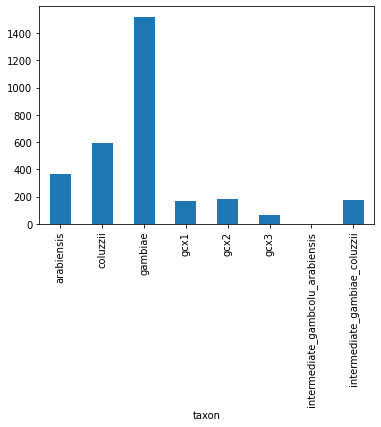

In [ ]:
df_samples.groupby("taxon").size().plot(
    kind="bar",

    )

In [ ]:
# Make a pivot table that shows how many samples are available in the Ag3.0 resource that were collected 
# in Mali, summarised by year, location and taxon. Now try Cameroon, or any other country of interest.

pivot_samples_mali = (
    df_samples.query("country == 'Mali'")
    .pivot_table(
        index=["country", "year", "location"], 
        columns=["taxon"], 
        values="sample_id",
        aggfunc="count",
        fill_value=0,
    )
)

pivot_samples_mali

taxon                        arabiensis  coluzzii  gambiae  \
country year location                                        
Mali    2004 Bancoumana               0         0        9   
             Douna                    1        19        0   
             Fanzana                  1         6        1   
             Kela                     0         0       23   
             Moribobougou             0         7        0   
             N'Gabakoro               0         4        0   
        2012 Takan                    0        26        5   
             Toumani Oulena           0         2       60   
        2014 Kababougou               0        12       28   
             Ouassorola               0         9        4   
             Tieneguebougou           0         6        1   

taxon                        intermediate_gambiae_coluzzii  
country year location                                       
Mali    2004 Bancoumana                                  0  
             Douna                                       0  
             Fanzana                                     0  
             Kela                                        0  
             Moribobougou                                0  
             N'Gabakoro                                  0  
        2012 Takan                                       0  
             Toumani Oulena                              1  
        2014 Kababougou                                  0  
             Ouassorola                                  0  
             Tieneguebougou                              0

In [ ]:
pivot_samples_uganda = (
    df_samples.query("country == 'Uganda'")
    .pivot_table(
        index=["country", "year", "location"], 
        columns=["taxon"], 
        values="sample_id",
        aggfunc="count",
        fill_value=0,
    )
)

pivot_samples_uganda

taxon                   arabiensis  gambiae  intermediate_gambcolu_arabiensis
country year location                                                        
Uganda  2012 Kihihi              1       95                                 0
             Nagongera          81      112                                 1

In [ ]:
# How many countries are there for which we have some samples of Anopheles coluzzii? 


pivot_samples_coluzzii = (
    df_samples.query("taxon == 'coluzzii'")
    .pivot_table(
        index=["country"], 
        columns=["taxon"], 
        values="sample_id",
        aggfunc="count",
        fill_value=0,
    )
)

pivot_samples_coluzzii


taxon,coluzzii
country,
Angola,81
Burkina Faso,135
Cameroon,26
Central African Republic,18
Cote d'Ivoire,80
"Gambia, The",14
Ghana,64
Guinea,11
Lab Cross,74


In [ ]:
# alternatively
df_samples.query("taxon == 'coluzzii'").groupby("country").size()

country
Angola                       81
Burkina Faso                135
Cameroon                     26
Central African Republic     18
Cote d'Ivoire                80
Gambia, The                  14
Ghana                        64
Guinea                       11
Lab Cross                    74
Mali                         91
dtype: int64

In [ ]:
# What about Anopheles arabiensis and Anopheles gambiae? Hint: Make a pivot table by country and taxon, and then query it.
pivot_samples_coluzzii = (
    df_samples
    .pivot_table(
        index=["country"], 
        columns=["taxon"], 
        values="sample_id",
        aggfunc="count",
        fill_value=0,
    )
)
pivot_samples_coluzzii.query("coluzzii > 0")

taxon,arabiensis,coluzzii,gambiae,gcx1,gcx2,gcx3,intermediate_gambcolu_arabiensis,intermediate_gambiae_coluzzii
country,,,,,,,,
Angola,0,81,0,0,0,0,0,0
Burkina Faso,3,135,157,0,0,0,0,1
Cameroon,2,26,416,0,0,0,0,0
Central African Republic,0,18,55,0,0,0,0,0
Cote d'Ivoire,0,80,0,0,0,0,0,0
"Gambia, The",0,14,2,77,185,0,0,1
Ghana,0,64,36,0,0,0,0,0
Guinea,0,11,123,0,0,0,0,2
Lab Cross,0,74,49,0,0,0,0,174


In [ ]:
# Plot a map of all sampling locations, changing the basemap parameter to show a different background map. 
# Hint: see the ipyleaflet basemaps documentation for a list of available options.
# create a map

m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.OpenTopoMap, 
    center=[0, 20], 
    zoom=3,
)


# add markers for sampling locations
for row in pivot_location_taxon.reset_index().itertuples():
    title = (
        f"{row.location}, {row.country} ({row.latitude:.3f}, {row.longitude:.3f})\n"
        f"{row.gambiae} gambiae, {row.coluzzii} coluzzii, {row.arabiensis} arabiensis"
    )
    marker = ipyleaflet.Marker(
        location=(row.latitude, row.longitude), 
        draggable=False,
        title=title,
    )
    m.add_layer(marker)

# add a scale bar
m.add_control(ipyleaflet.ScaleControl(position="bottomleft"))

# display the map
m

Map(center=[0, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
# Plot a map that starts centered and zoomed in to Uganda, or any other country of interest.
# Hint: change the center and zoom parameters when calling the ipyleaflet Map() function.

uganda = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Stamen.Toner,
    center=[1.3, 32],
    zoom=6.3,
)


# add markers for sampling locations
for row in pivot_location_taxon.reset_index().itertuples():
    title = (
        f"{row.location}, {row.country} ({row.latitude:.3f}, {row.longitude:.3f})\n"
        f"{row.gambiae} gambiae, {row.coluzzii} coluzzii, {row.arabiensis} arabiensis"
    )
    marker = ipyleaflet.Marker(
        location=(row.latitude, row.longitude), 
        draggable=False,
        title=title,
    )
    uganda.add_layer(marker)

# add a scale bar
uganda.add_control(ipyleaflet.ScaleControl(position="bottomleft"))

# display the map
uganda

Map(center=[1.3, 32], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

In [ ]:
mozambique = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Stamen.Toner,
    center=[-19,43],
    zoom=4.7,
)


# add markers for sampling locations
for row in pivot_location_taxon.reset_index().itertuples():
    title = (
        f"{row.location}, {row.country} ({row.latitude:.3f}, {row.longitude:.3f})\n"
        f"{row.gambiae} gambiae, {row.coluzzii} coluzzii, {row.arabiensis} arabiensis"
    )
    marker = ipyleaflet.Marker(
        location=(row.latitude, row.longitude), 
        draggable=False,
        title=title,
    )
    mozambique.add_layer(marker)

# add a scale bar
mozambique.add_control(ipyleaflet.ScaleControl(position="bottomleft"))

# display the map
mozambique

Map(center=[-19, 43], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

In [ ]:
# Plot a map showing only locations where we have samples of Anopheles coluzzii. 

coluzzii_only = (
    df_samples.query("taxon == 'coluzzii'")
    .pivot_table(
        index=["country", "location", "latitude", "longitude"], 
        columns=["taxon"], 
        values="sample_id",
        aggfunc="count",
        fill_value=0,
    )
)


coluzzii_map = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Stamen.Toner,
    center=[0,20],
    zoom=3,
)


# add markers for sampling locations
for row in coluzzii_only.reset_index().itertuples():
    title = (
        f"{row.location}, {row.country} ({row.latitude:.3f}, {row.longitude:.3f})\n"
        f"{row.coluzzii} coluzzii"
    )
    marker = ipyleaflet.Marker(
        location=(row.latitude, row.longitude), 
        draggable=False,
        title=title,
    )
    coluzzii_map.add_layer(marker)

# add a scale bar
coluzzii_map.add_control(ipyleaflet.ScaleControl(position="bottomleft"))

coluzzii_map

Map(center=[0, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
# Now try Anopheles gambiae.
gambiae_only = (
    df_samples.query("taxon == 'gambiae'")
    .pivot_table(
        index=["country", "location", "latitude", "longitude"], 
        columns=["taxon"], 
        values="sample_id",
        aggfunc="count",
        fill_value=0,
    )
)


gambiae_map = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Stamen.Toner,
    center=[0,20],
    zoom=3,
)


# add markers for sampling locations
for row in gambiae_only.reset_index().itertuples():
    title = (
        f"{row.location}, {row.country} ({row.latitude:.3f}, {row.longitude:.3f})\n"
        f"{row.gambiae} gambiae"
    )
    marker = ipyleaflet.Marker(
        location=(row.latitude, row.longitude), 
        draggable=False,
        title=title,
    )
    gambiae_map.add_layer(marker)

# add a scale bar
gambiae_map.add_control(ipyleaflet.ScaleControl(position="bottomleft"))

gambiae_map

Map(center=[0, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
# Anopheles arabiensis

arabiensis_only = (
    df_samples.query("taxon == 'arabiensis'")
    .pivot_table(
        index=["country", "location", "latitude", "longitude"], 
        columns=["taxon"], 
        values="sample_id",
        aggfunc="count",
        fill_value=0,
    )
)


arabiensis_map = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Stamen.Toner,
    center=[0,20],
    zoom=3,
)


# add markers for sampling locations
for row in arabiensis_only.reset_index().itertuples():
    title = (
        f"{row.location}, {row.country} ({row.latitude:.3f}, {row.longitude:.3f})\n"
        f"{row.arabiensis} arabiensis"
    )
    marker = ipyleaflet.Marker(
        location=(row.latitude, row.longitude), 
        draggable=False,
        title=title,
    )
    arabiensis_map.add_layer(marker)

# add a scale bar
arabiensis_map.add_control(ipyleaflet.ScaleControl(position="bottomleft"))

arabiensis_map

Map(center=[0, 20], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
!pip install pivottablejs
from pivottablejs import pivot_ui

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# If you feel like a challenge, plot a map with markers for sampling locations, 
# and add a popup to each marker showing a pivot table of how many samples were collected by year and species.

# create a map
m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.OpenStreetMap.Mapnik, 
    center=[0, 20], 
    zoom=3,
)

# add markers for sampling locations
for row in pivot_location_taxon.reset_index().itertuples():
    title = (
        f"{row.location}, {row.country} ({row.latitude:.3f}, {row.longitude:.3f})\n"
        f"{row.gambiae} gambiae, {row.coluzzii} coluzzii, {row.arabiensis} arabiensis"
    )
    marker = ipyleaflet.Marker(
        location=(row.latitude, row.longitude), 
        draggable=False,
        title=title,
    )

    location_widget =  pivot_ui((df_samples.pivot_table(
        index=["location","year"], 
        columns=["taxon"], 
        values="sample_id",
        aggfunc="count",
        fill_value=0,)))

    popup = ipyleaflet.Popup(
        location = (row.latitude, row.longitude),
        child = location_widget,
        close_button = True,
        auto_close = True)

    m.add_layer(marker)
    m.add_layer(popup)

    #marker.popup = 

# add a scale bar
m.add_control(ipyleaflet.ScaleControl(position="bottomleft"))

# display the map
m

TraitError: ignored

In [ ]:

    
df_samples.pivot_table(
        index=["location","year"], 
        columns=["taxon"], 
        values="sample_id",
        aggfunc="count",
        fill_value=0,)))

location_widget